# Performance Tradeoffs of General-Purpose Digital Hardware and Application-Specific Analog Hardware



In [4]:
from datetime import date

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# data from https://epochai.org/blog/trends-in-machine-learning-hardware
gpu_data = pd.read_excel("data/ML-Hardware-Data.xlsx", "HARDWARE_DATA")
gpu_data.tail()

,v,Manufacturer,FP64 Performance (FLOP/s),FP32 Performance (FLOP/s),FP16 Performance (FLOP/s),FP/TF32 Tensor Performance (FLOP/s),FP16 Tensor Performance (FLOP/s),FP8 Tensor Performance (FLOP/s),INT16 Performance (OP/s),INT8 Tensor Performance (OP/s),...,TMUs,ROPs,SM count,Tensor cores,RT cores,Prominent Years of usage,Link to datasheet,Secondary datasheet,Third datasheet,Source for the Price
43,NVIDIA Quadro K6000,NVIDIA,1.732000e+12,5.196000e+12,NaN,NaN,NaN,NaN,NaN,NaN,...,240.0,48.0,15.0,NaN,NaN,NaN,https://www.techpowerup.com/gpu-specs/quadro-k...,NaN,NaN,NaN
44,NVIDIA Tesla K20c,NVIDIA,1.170000e+12,3.520000e+12,NaN,NaN,NaN,NaN,NaN,NaN,...,208.0,40.0,13.0,NaN,NaN,NaN,https://www.techpowerup.com/gpu-specs/tesla-k2...,NaN,NaN,NaN
45,NVIDIA GeForce GTX 580,NVIDIA,1.976000e+11,1.581000e+12,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,48.0,16.0,NaN,NaN,NaN,https://www.techpowerup.com/gpu-specs/geforce-...,NaN,NaN,NaN
46,NVIDIA GeForce GTX 280,NVIDIA,7.776000e+10,6.221000e+11,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,32.0,30.0,NaN,NaN,NaN,https://www.techpowerup.com/gpu-specs/geforce-...,NaN,NaN,NaN
47,NVIDIA P100 PCIe 16GB,NVIDIA,4.700000e+12,9.560000e+12,1.910000e+13,NaN,NaN,NaN,NaN,NaN,...,224.0,96.0,56.0,NaN,NaN,NaN,https://www.techpowerup.com/gpu-specs/tesla-p1...,https://images.nvidia.com/content/tesla/pdf/nv...,NaN,NaN


In [6]:
# data from https://github.com/areuther/ai-accelerators/blob/main/peak_2023.md
peak_accelerators = pd.read_csv("data/peak_accelerators_ieee_hpec_2023.csv")
peak_accelerators = peak_accelerators[(peak_accelerators["Technology"] == "neuromorphic")]

In [7]:
peak_accelerators.tail()

,Company,Product,Label,PeakPerformance,Precision,Power,Technology,IorT,FormFactor,PlotLocation,Hide,PlotLocationZ,HideZ,Updated,Notes,ReferenceURL,Reference
60,IBM,TrueNorth,TrueNorth,1.890000e+12,int8,0.50,neuromorphic,inference,System,SW,Hide,SW,Hide,6/9/20,NaN,https://www.top500.org/news/ibm-finds-killer-a...,﻿feldman2016ibm;esser2016convolutional;akopyan...
61,IBM,TrueNorth,TrueNorthSys,1.890000e+12,int8,44.00,neuromorphic,inference,System,SE,Hide,SE,Hide,6/9/20,NaN,https://www.top500.org/news/ibm-finds-killer-a...,﻿feldman2016ibm;esser2016convolutional;akopyan...
132,Tsinghua,Tianjic,Tianjic,1.210000e+12,int8,0.95,neuromorphic,inference,Chip,S,Hide,S,Hide,6/13/20,ANN/SNN research chip,http://www.nature.com/articles/s41586-019-1424-8,pei2019towards


## Part 1: Compute capacity

In our case, we measure compute capacity as the number of floating-point operations per second (FLOPS).

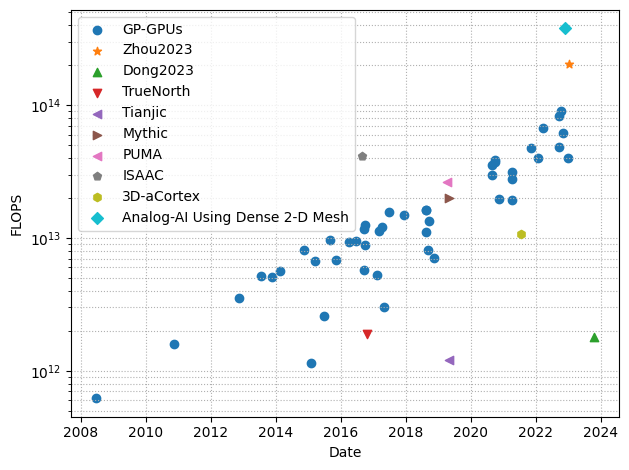

In [8]:
plt.figure()

plt.grid(True, which="both", ls=":", zorder=1)

plt.scatter([x["Release date"] for _, x in gpu_data.iterrows()], [x["FP32 Performance (FLOP/s)"] for _, x in gpu_data.iterrows()], label="GP-GPUs")

plt.scatter([date(2023, 1, 6)], [2 * 16 * 16 * 16 * 25 * 1e9], label="Zhou2023", marker="*", zorder=15) # table S2

plt.scatter([date(2023, 10, 19)], [1.8 * 1e12], label="Dong2023", marker="^", zorder=15)

plt.scatter([date(2016, 10, 19)], [1.890000e+12], label="TrueNorth", marker="v", zorder=15)

plt.scatter([date(2019, 5, 7)], [1.210000e+12], label="Tianjic", marker="<", zorder=15)

plt.scatter([date(2019, 5, 7)], [20e+12], label="Mythic", marker=">", zorder=15)

plt.scatter([date(2019, 4, 13)], [26.2e+12], label="PUMA", marker="<", zorder=15)

plt.scatter([date(2016, 8, 25)], [41.3e+12], label="ISAAC", marker="p", zorder=15)

plt.scatter([date(2021, 7, 15)], [10.7e+12], label="3D-aCortex", marker="h", zorder=15)

plt.scatter([date(2022, 11, 21)], [376.7e+12], label="Analog-AI Using Dense 2-D Mesh", marker="D", zorder=15)

plt.xlabel("Date")
plt.ylabel("FLOPS")

plt.yscale("log")
plt.legend(loc=2)
plt.tight_layout()

plt.savefig("figures/capacity.pdf")
plt.savefig("figures/capacity.svg")

plt.show()

## Part 2: Efficiency

In our case, we measure efficiency in FLOPS/Watt.

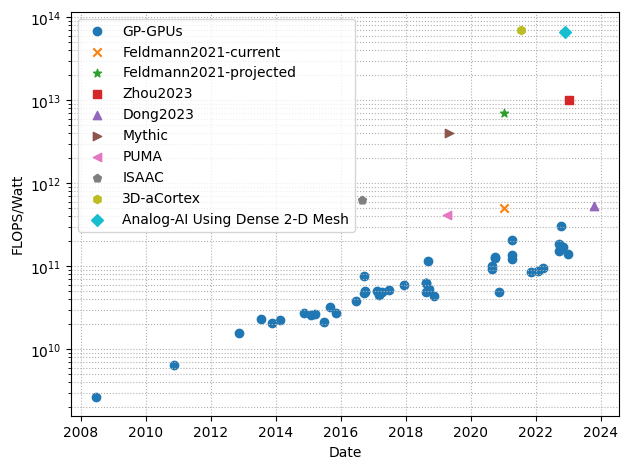

In [9]:
plt.figure()

plt.grid(True, which="both", ls=":", zorder=1)

plt.scatter([x["Release date"] for _, x in gpu_data.iterrows()], [x["FP32 Performance (FLOP/s)"] / x["TDP in W"] for _, x in gpu_data.iterrows()], label="GP-GPUs")
plt.scatter([date(2021, 1, 6)], [500 * 1e9], label="Feldmann2021-current", marker="x", zorder=11) # table S1
plt.scatter([date(2021, 1, 6)], [7_000 * 1e9], label="Feldmann2021-projected", marker="*", zorder=12) # table S2
plt.scatter([date(2023, 1, 6)], [10_000 * 1e9], label="Zhou2023", marker="s", zorder=13) # table S2
plt.scatter([date(2023, 10, 19)], [540 * 1e9], label="Dong2023", marker="^", zorder=13) # table S2
plt.scatter([date(2019, 5, 7)], [4e+12], label="Mythic", marker=">", zorder=15)
plt.scatter([date(2019, 4, 13)], [0.42e+12], label="PUMA", marker="<", zorder=15)
plt.scatter([date(2016, 8, 25)], [0.63e+12], label="ISAAC", marker="p", zorder=15)
plt.scatter([date(2021, 7, 15)], [70.4e+12], label="3D-aCortex", marker="h", zorder=15)
plt.scatter([date(2022, 11, 21)], [65.6e+12], label="Analog-AI Using Dense 2-D Mesh", marker="D", zorder=15)

plt.yscale("log")

plt.xlabel("Date")
plt.ylabel("FLOPS/Watt")
plt.legend(loc=2)
plt.tight_layout()

plt.savefig("figures/compute_efficiency.pdf")
plt.savefig("figures/compute_efficiency.svg")

plt.show()

## Part 3: Compute density

Compute density in $FLOPS/mm^2$

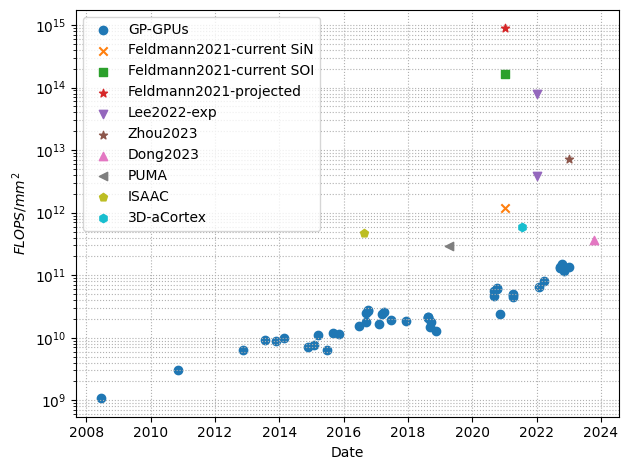

In [10]:
plt.figure()

plt.grid(True, which="both", ls=":", zorder=1)

plt.scatter([x["Release date"] for _, x in gpu_data.iterrows()], [x["FP32 Performance (FLOP/s)"] / x["Die Size in mm^2"] for _, x in gpu_data.iterrows()], label="GP-GPUs")
plt.scatter([date(2021, 1, 6)], [1.2 * 1e12], label="Feldmann2021-current SiN", marker="x", zorder=11) # table S1
plt.scatter([date(2021, 1, 6)], [162 * 1e12], label="Feldmann2021-current SOI", marker="s", zorder=12) # table S1
plt.scatter([date(2021, 1, 6)], [880 * 1e12], label="Feldmann2021-projected", marker="*", zorder=13) # table S2
plt.scatter([date(2022, 1, 6), date(2022, 1, 6)], [3.8 * 1e12, 80 * 1e12], label="Lee2022-exp", marker="v", zorder=14) # table S2
plt.scatter([date(2023, 1, 6)], [7.3 * 1e12], label="Zhou2023", marker="*", zorder=15) # table S2
plt.scatter([date(2023, 10, 19)], [370 * 1e9], label="Dong2023", marker="^", zorder=15) # table S2
plt.scatter([date(2019, 4, 13)], [0.29e+12], label="PUMA", marker="<", zorder=15)
plt.scatter([date(2016, 8, 25)], [0.48e+12], label="ISAAC", marker="p", zorder=15)
plt.scatter([date(2021, 7, 15)], [0.58e+12], label="3D-aCortex", marker="h", zorder=15)

plt.xlabel("Date")
plt.ylabel("$FLOPS/mm^2$")

plt.yscale("log")
plt.legend(loc=2)
plt.tight_layout()

plt.savefig("figures/compute_density.pdf")
plt.savefig("figures/compute_density.svg")

plt.show()